In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Amazon_Product_Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,date,title,rating,body,model
0,0,4 May 2019,"Platina on, Garmi gone! Efficient cooler for n...",4.0,Summer and air cooler goes synonymously. As te...,Old Model
1,1,6 March 2023,Noise level,4.0,"Overall product is great , at this price you c...",New Model
2,2,22 March 2023,Superb,4.0,Very good product ☺️ superrrr,New Model
3,3,22 March 2023,OK,4.0,this product is good it is bajaj one.,New Model
4,4,19 March 2023,"Im okey with this, never loose your Money",4.0,The media could not be loaded.\n ...,New Model


In [4]:
df.drop(["Unnamed: 0",'date','title','model','rating'], axis= 1,inplace=True)

In [5]:
df.head()

,body
0,Summer and air cooler goes synonymously. As te...
1,"Overall product is great , at this price you c..."
2,Very good product ☺️ superrrr
3,this product is good it is bajaj one.
4,The media could not be loaded.\n ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    4935 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [7]:
df.shape

(5000, 1)

In [8]:
df.describe()

,body
count,4935
unique,4313
top,Good
freq,146


##### Checking for Null Values and Removing Null Values

In [9]:
df.isnull().sum()

body    65
dtype: int64

In [10]:
df1 = df.dropna().reset_index(drop=True)

In [11]:
df1.tail()

,body
4930,It smells badly.want to replace
4931,Water💧 capacity low
4932,Dont buy this product..
4933,It is best very small room
4934,Bad quality product with the high price


In [12]:
df1.shape

(4935, 1)

In [13]:
df1.duplicated().sum()

622

In [14]:
df1 = df1.drop_duplicates().reset_index(drop=True)

In [15]:
df1.shape

(4313, 1)

In [16]:
df1.head()

,body
0,Summer and air cooler goes synonymously. As te...
1,"Overall product is great , at this price you c..."
2,Very good product ☺️ superrrr
3,this product is good it is bajaj one.
4,The media could not be loaded.\n ...


#### Making all the reviews lower

In [17]:
def lower_case_sent(sentence):
    split_words = [sentence.lower() for sentence in sentence.split()]
    lower_case_sent = " ".join(split_words)
    return lower_case_sent

df1['body'] = df1['body'].apply(lower_case_sent)

In [18]:
df1.head()

,body
0,summer and air cooler goes synonymously. as te...
1,"overall product is great , at this price you c..."
2,very good product ☺️ superrrr
3,this product is good it is bajaj one.
4,the media could not be loaded. with this budge...


#### Removing Punctuations from Reviews

In [19]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df1['body'] = df1['body'].apply(punctuation_removal)

In [20]:
df1.head()

,body
0,summer and air cooler goes synonymously as tem...
1,overall product is great at this price you co...
2,very good product ☺️ superrrr
3,this product is good it is bajaj one
4,the media could not be loaded with this budget...


#### Removing Numbers from Reviews

In [21]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df1['body'] = df1['body'].apply(drop_numbers)

In [22]:
df1.tail(10)

,body
4303,poor cooling quality
4304,very bed experience
4305,not much useful
4306,very bad plastic quality
4307,motor issue in one week
4308,it smells badlywant to replace
4309,water💧 capacity low
4310,dont buy this product
4311,it is best very small room
4312,bad quality product with the high price


#### Removing URL's

In [23]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

df1['body'] = df1['body'].apply(lambda x : remove_url(x))

#### Removing @names

In [24]:
def remove_pattern(text):
    doc = re.compile(r"@[\w]*")
    return doc.sub(r'',text)

df1['body'] = df1['body'].apply(lambda x : remove_pattern(x))

#### Removing HTML Tag's

In [25]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df1['body'] = df1['body'].apply(lambda x : remove_html(x))

In [26]:
df1.head(10)

,body
0,summer and air cooler goes synonymously as tem...
1,overall product is great at this price you co...
2,very good product ☺️ superrrr
3,this product is good it is bajaj one
4,the media could not be loaded with this budget...
5,good
6,the media could not be loaded damaged product ...
7,nice product comfortable regular easy moving
8,very best at this price rangenoise level and i...
9,air throw is powerful water inlet is at back s...


#### Removing Emojis

In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df1['body'] = df1['body'].apply(lambda x : remove_emoji(x))

#### Removing Special Character's

In [28]:
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
df1['body'] = df1['body'].apply(lambda x : remove_special_characters(x))

#### Removing Stop Words

In [29]:
stop = stopwords.words('english')
new_stop_words = ['media','could','loaded']
stop.extend(new_stop_words)

In [30]:
def stop_words_removal(sent):
    not_stop_words = [sent for sent in sent.split() if sent not in stop]
    clean_sent = " ".join(not_stop_words)
    return clean_sent

df1['body'] = df1['body'].apply(stop_words_removal)

In [31]:
df1.head()

,body
0,summer air cooler goes synonymously temperatur...
1,overall product great price get coolingnormal ...
2,good product superrrr
3,product good bajaj one
4,budget satisfied producing cool wind looking a...


#### Spell Correction

In [32]:
df1['body'] = df1['body'].apply(lambda x: str(TextBlob(x).correct()))

In [33]:
df1.head()

,body
0,summer air cooper goes synonymous temperatures...
1,overall product great price get coolingnormal ...
2,good product superior
3,product good basal one
4,budget satisfied producing cool wind looking a...


### Lemmatize a Sentence with the appropriate POS tag

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tarunvannelli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##### Function For getting POS

In [35]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

##### Function for Lemmatization of Tokenized Sentence

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
def lema_tokenize_sent(sentence):
    sentence_words = [lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
    complete_sentence = " ".join(sentence_words)
    return complete_sentence

df1['review_after_tokenization_lematization'] = df1['body'].apply(lema_tokenize_sent)

In [38]:
df1.head(10)

,body,review_after_tokenization_lematization
0,summer air cooper goes synonymous temperatures...,summer air cooper go synonymous temperature go...
1,overall product great price get coolingnormal ...,overall product great price get coolingnormal ...
2,good product superior,good product superior
3,product good basal one,product good basal one
4,budget satisfied producing cool wind looking a...,budget satisfied produce cool wind look also g...
5,good,good
6,damaged product receivedupper side cracked lin...,damage product receivedupper side crack lining...
7,nice product comfortable regular easy moving,nice product comfortable regular easy move
8,best price rangenoise level built material goo...,best price rangenoise level built material goo...
9,air throw powerful water let back side place s...,air throw powerful water let back side place s...


#### Calculating the Sentiment using SentimentIntensityAnalyzer

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
sid = SentimentIntensityAnalyzer()
df1['scores'] = df1['review_after_tokenization_lematization'].apply(lambda review: sid.polarity_scores(review))

In [41]:
df1.head()

,body,review_after_tokenization_lematization,scores
0,summer air cooper goes synonymous temperatures...,summer air cooper go synonymous temperature go...,"{'neg': 0.05, 'neu': 0.76, 'pos': 0.19, 'compo..."
1,overall product great price get coolingnormal ...,overall product great price get coolingnormal ...,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp..."
2,good product superior,good product superior,"{'neg': 0.0, 'neu': 0.135, 'pos': 0.865, 'comp..."
3,product good basal one,product good basal one,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
4,budget satisfied producing cool wind looking a...,budget satisfied produce cool wind look also g...,"{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'com..."


##### You can see here the Example of sentiment scores for one review 

In [42]:
print(df1.review_after_tokenization_lematization[4])
print(df1.scores[4])

budget satisfied produce cool wind look also good noise level little high disturbed well packed recently manufacture item deliver thanks
{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'compound': 0.8561}


In [43]:
df1['compound']  = df1['scores'].apply(lambda scores: scores['compound'])
df1.head()

,body,review_after_tokenization_lematization,scores,compound
0,summer air cooper goes synonymous temperatures...,summer air cooper go synonymous temperature go...,"{'neg': 0.05, 'neu': 0.76, 'pos': 0.19, 'compo...",0.9963
1,overall product great price get coolingnormal ...,overall product great price get coolingnormal ...,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...",0.8834
2,good product superior,good product superior,"{'neg': 0.0, 'neu': 0.135, 'pos': 0.865, 'comp...",0.7506
3,product good basal one,product good basal one,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404
4,budget satisfied producing cool wind looking a...,budget satisfied produce cool wind look also g...,"{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'com...",0.8561


In [44]:
df1['sentiment_SIA'] = df1['compound'].apply(lambda c: "Positive" if c >=0.05 else ("Negative" if c<=-0.05  else "Neutral"))
df1.head()

,body,review_after_tokenization_lematization,scores,compound,sentiment_SIA
0,summer air cooper goes synonymous temperatures...,summer air cooper go synonymous temperature go...,"{'neg': 0.05, 'neu': 0.76, 'pos': 0.19, 'compo...",0.9963,Positive
1,overall product great price get coolingnormal ...,overall product great price get coolingnormal ...,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...",0.8834,Positive
2,good product superior,good product superior,"{'neg': 0.0, 'neu': 0.135, 'pos': 0.865, 'comp...",0.7506,Positive
3,product good basal one,product good basal one,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Positive
4,budget satisfied producing cool wind looking a...,budget satisfied produce cool wind look also g...,"{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'com...",0.8561,Positive


In [45]:
print(df1['sentiment_SIA'].value_counts())

Positive    2778
Negative     924
Neutral      611
Name: sentiment_SIA, dtype: int64


<AxesSubplot: xlabel='sentiment_SIA', ylabel='count'>

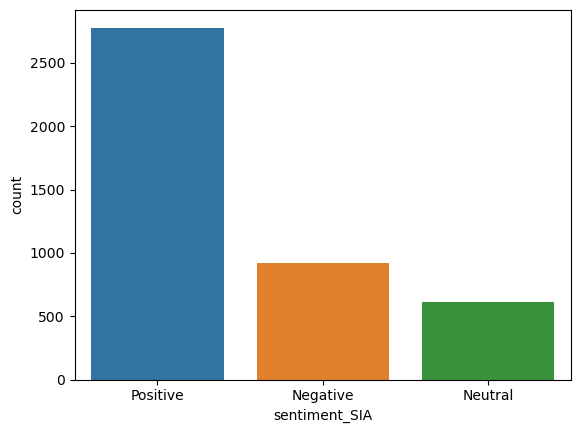

In [46]:
sns.countplot(x=df1['sentiment_SIA'])

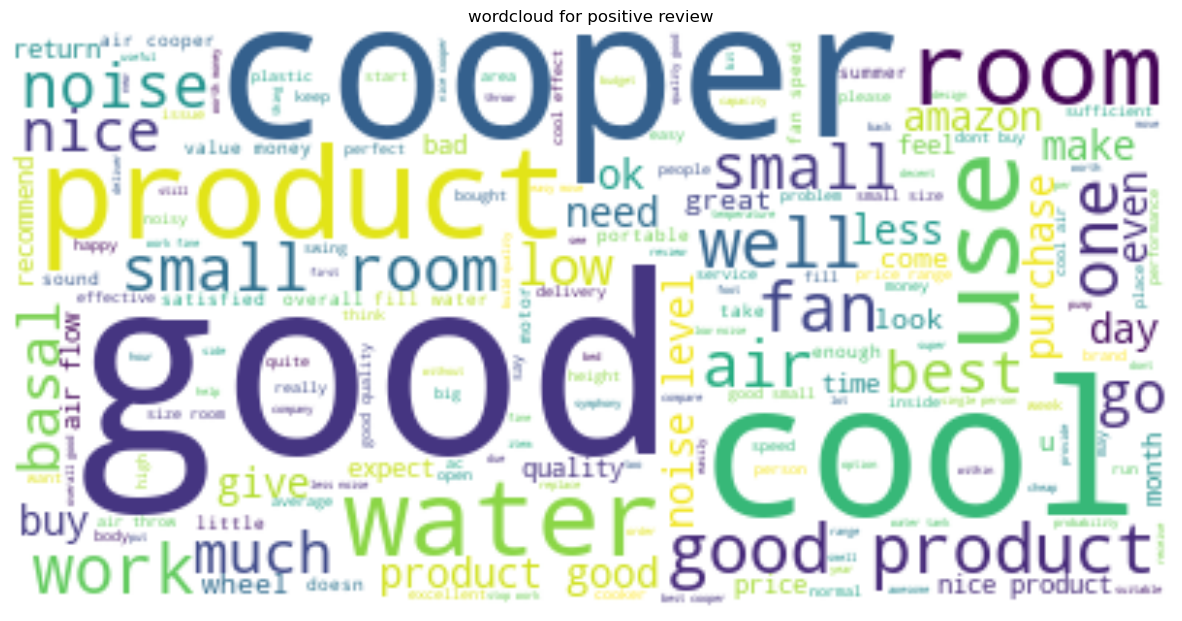

In [47]:
text = " ".join(i for i in df1[df1['sentiment_SIA']== 'Positive']['review_after_tokenization_lematization'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

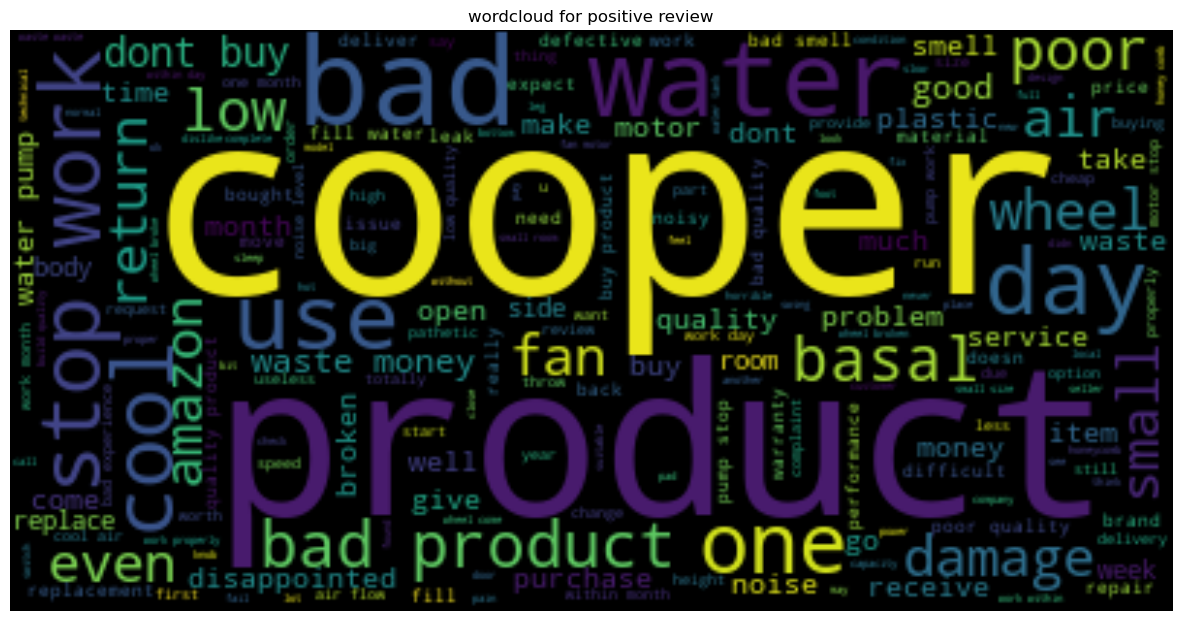

In [48]:
text = " ".join(i for i in df1[df1['sentiment_SIA']== 'Negative' ]['review_after_tokenization_lematization'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

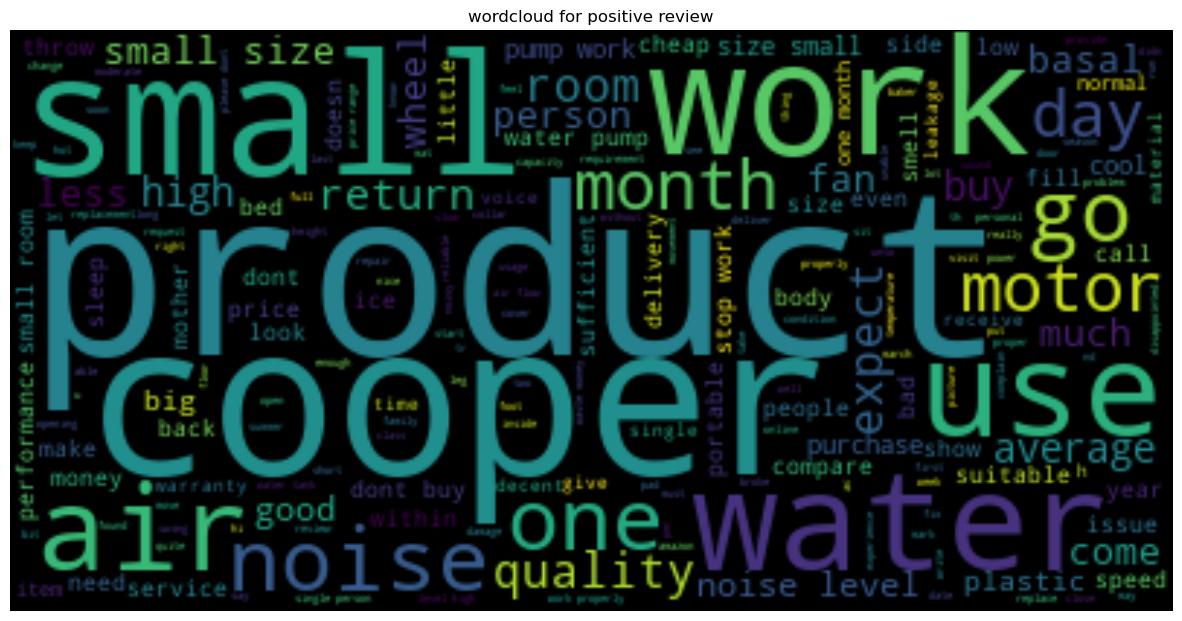

In [49]:
text = " ".join(i for i in df1[df1['sentiment_SIA']== 'Neutral' ]['review_after_tokenization_lematization'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

#### Label Encoder

In [50]:
from sklearn import preprocessing

In [51]:
label_encoder = preprocessing.LabelEncoder()
df1['sentiment_SIA']= label_encoder.fit_transform(df1['sentiment_SIA'])

In [52]:
print(df1['sentiment_SIA'].value_counts())

2    2778
0     924
1     611
Name: sentiment_SIA, dtype: int64


In [53]:
df1.head()

,body,review_after_tokenization_lematization,scores,compound,sentiment_SIA
0,summer air cooper goes synonymous temperatures...,summer air cooper go synonymous temperature go...,"{'neg': 0.05, 'neu': 0.76, 'pos': 0.19, 'compo...",0.9963,2
1,overall product great price get coolingnormal ...,overall product great price get coolingnormal ...,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...",0.8834,2
2,good product superior,good product superior,"{'neg': 0.0, 'neu': 0.135, 'pos': 0.865, 'comp...",0.7506,2
3,product good basal one,product good basal one,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,2
4,budget satisfied producing cool wind looking a...,budget satisfied produce cool wind look also g...,"{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'com...",0.8561,2


#### Splitting the Data into train and test

In [54]:
X = df1['review_after_tokenization_lematization'].values

In [55]:
X

array(['summer air cooper go synonymous temperature go bearing limit need cooper earlier cooper go bad last season wait another summer one friend recommendation select along model manufacturer like symphony crompton etcupon subsequent analysis wet price point feature utility basal platonic emerge top among similar range product company budget may one strong factor govern inclination inside box cooper manual warranty card pro good look lightweight portable good quality construction effective cool room size oft honeycomb type cool pad three side effective cool castor wheel no easy relation noise level acceptable range good capacity water tank single fill last full hour continuous usage auto swing ensures uniform cool room right left full plastic body mean issue like metal desert cooker rust start leak time easy mechanical water level indicator let know tank empty sufficiently long cable approve metre require extension cord son instal honeycomb type pad difficult find need settle normal g

In [56]:
y = df1['sentiment_SIA'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#### TF-IDF Vectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000,max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [61]:
tfidf_vectorizer.vocabulary_

{'gun': 558,
 'number': 879,
 'work': 1486,
 'bad': 84,
 'smell': 1226,
 'come': 231,
 'cooper': 280,
 'air': 33,
 'throw': 1350,
 'good': 541,
 'cool': 273,
 'nice': 866,
 'thing': 1346,
 'need': 860,
 'proper': 1025,
 'ventilator': 1427,
 'perform': 946,
 'basic': 98,
 'principle': 1001,
 'sanction': 1149,
 'easily': 403,
 'observe': 884,
 'poor': 977,
 'performance': 947,
 'room': 1129,
 'fully': 527,
 'close': 215,
 'product': 1011,
 'capacity': 162,
 'local': 741,
 'cooker': 271,
 'time': 1356,
 'fan': 466,
 'speed': 1250,
 'slow': 1221,
 'positive': 983,
 'sound': 1242,
 'produce': 1010,
 'horrible': 609,
 'highly': 595,
 'expensive': 444,
 'price': 997,
 'range': 1052,
 'bit': 115,
 'small': 1223,
 'material': 786,
 'plastic': 968,
 'unable': 1395,
 'size': 1214,
 'door': 383,
 'kitchen': 694,
 'extremely': 453,
 'noisy': 872,
 'sit': 1212,
 'service': 1187,
 'leakage': 708,
 'fix': 497,
 'day': 314,
 'use': 1415,
 'ab': 0,
 'matas': 784,
 'safi': 1146,
 'admit': 24,
 'ke': 685,

### Balancing The Data

##### Here We are Balancing the Data only on Training Dataset.if you divide oversample data with train_test_split then you have no control over the distribution of duplicated items for test and train. Which means that you can have the same observation in both test and train, which means you test partially on the training set

#### SMOTE:Synthetic Minority Oversampling Technique

In [62]:
from imblearn.over_sampling import SMOTE
import collections

In [63]:
smt = SMOTE()
X_train_tfidf_sm,y_train_sm = smt.fit_resample(X_train_tfidf,y_train)

In [64]:
print('Before Balancing:',collections.Counter(y_train))
print('After Balancing:',collections.Counter(y_train_sm))

Before Balancing: Counter({2: 2198, 0: 766, 1: 486})
After Balancing: Counter({0: 2198, 2: 2198, 1: 2198})


#### SMOTE + Tomek Links

In [65]:
from imblearn.combine import SMOTETomek

In [66]:
smtom = SMOTETomek(random_state=128)
X_train_tfidf_smotek,y_train_smtomek = smtom.fit_resample(X_train_tfidf,y_train)

In [67]:
print('Before Balancing:',collections.Counter(y_train))
print('After Balancing:',collections.Counter(y_train_smtomek))

Before Balancing: Counter({2: 2198, 0: 766, 1: 486})
After Balancing: Counter({1: 2198, 0: 2195, 2: 2195})


### Model Building

#### Naive-Bayes Classifier

In [68]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB , BernoulliNB,GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
def model_compute(model_name,x_train,y_train,x_test,y_test):
    
    if model_name=='cnb':
        CNB = ComplementNB()
        CNB.fit(x_train, y_train)
        predicted_CNB = CNB.predict(x_test)
        print(classification_report(y_test, predicted_CNB))
        
    elif model_name=='mnb':
        MNB = MultinomialNB()
        MNB.fit(x_train, y_train)
        predicted_MNB = MNB.predict(x_test)
        print(classification_report(y_test, predicted_MNB))
    elif model_name=='gnb':
        GNB = GaussianNB()
        GNB.fit(x_train, y_train)
        predicted_GNB = GNB.predict(x_test)
        print(classification_report(y_test, predicted_GNB))
    elif model_name=='bnb':
        BNB = BernoulliNB()
        BNB.fit(x_train, y_train)
        predicted_BNB = BNB.predict(x_test)
        print(classification_report(y_test, predicted_BNB))      

##### Complement NB model 

In [70]:
print("CNB With IMBALACED DATA")
model_compute("cnb",X_train_tfidf,y_train,X_test_tfidf,y_test)
print("CNB With BALACED DATA(SMOTE)")
model_compute("cnb",X_train_tfidf_sm,y_train_sm,X_test_tfidf,y_test)
print("CNB With BALACED DATA(SMOTE-TOMEK)")
model_compute("cnb",X_train_tfidf_smotek,y_train_smtomek,X_test_tfidf,y_test)

CNB With IMBALACED DATA
              precision    recall  f1-score   support

           0       0.55      0.87      0.68       158
           1       0.66      0.25      0.36       125
           2       0.88      0.86      0.87       580

    accuracy                           0.77       863
   macro avg       0.70      0.66      0.64       863
weighted avg       0.79      0.77      0.76       863

CNB With BALACED DATA(SMOTE)
              precision    recall  f1-score   support

           0       0.58      0.88      0.70       158
           1       0.64      0.46      0.53       125
           2       0.91      0.84      0.88       580

    accuracy                           0.79       863
   macro avg       0.71      0.73      0.70       863
weighted avg       0.81      0.79      0.79       863

CNB With BALACED DATA(SMOTE-TOMEK)
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       158
           1       0.66      0.46      0.

##### Multinomial NB model

In [71]:
print("MNB With IMBALACED DATA")
model_compute("mnb",X_train_tfidf,y_train,X_test_tfidf,y_test)
print("MNB With BALACED DATA(SMOTE)")
model_compute("mnb",X_train_tfidf_sm,y_train_sm,X_test_tfidf,y_test)
print("MNB With BALACED DATA(SMOTE-TOMEK)")
model_compute("mnb",X_train_tfidf_smotek,y_train_smtomek,X_test_tfidf,y_test)

MNB With IMBALACED DATA
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       158
           1       1.00      0.02      0.05       125
           2       0.76      0.97      0.85       580

    accuracy                           0.75       863
   macro avg       0.83      0.51      0.51       863
weighted avg       0.79      0.75      0.69       863

MNB With BALACED DATA(SMOTE)
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       158
           1       0.60      0.54      0.57       125
           2       0.92      0.82      0.87       580

    accuracy                           0.78       863
   macro avg       0.70      0.73      0.70       863
weighted avg       0.81      0.78      0.79       863

MNB With BALACED DATA(SMOTE-TOMEK)
              precision    recall  f1-score   support

           0       0.58      0.84      0.69       158
           1       0.63      0.58      0.

##### Guassian NB model

In [72]:
print("GNB With IMBALACED DATA")
model_compute("gnb",X_train_tfidf,y_train,X_test_tfidf,y_test)
print("GNB With BALACED DATA(SMOTE)")
model_compute("gnb",X_train_tfidf_sm,y_train_sm,X_test_tfidf,y_test)
print("GNB With BALACED DATA(SMOTE-TOMEK)")
model_compute("gnb",X_train_tfidf_smotek,y_train_smtomek,X_test_tfidf,y_test)

GNB With IMBALACED DATA
              precision    recall  f1-score   support

           0       0.26      0.40      0.32       158
           1       0.23      0.65      0.34       125
           2       0.81      0.38      0.52       580

    accuracy                           0.42       863
   macro avg       0.44      0.47      0.39       863
weighted avg       0.63      0.42      0.45       863

GNB With BALACED DATA(SMOTE)
              precision    recall  f1-score   support

           0       0.29      0.41      0.34       158
           1       0.23      0.62      0.33       125
           2       0.82      0.42      0.55       580

    accuracy                           0.45       863
   macro avg       0.44      0.48      0.41       863
weighted avg       0.63      0.45      0.48       863

GNB With BALACED DATA(SMOTE-TOMEK)
              precision    recall  f1-score   support

           0       0.28      0.41      0.33       158
           1       0.23      0.62      0.

#####  Bernoulli NB model

In [73]:
print("BNB With IMBALACED DATA")
model_compute("bnb",X_train_tfidf,y_train,X_test_tfidf,y_test)
print("BNB With BALACED DATA(SMOTE)")
model_compute("bnb",X_train_tfidf_sm,y_train_sm,X_test_tfidf,y_test)
print("BNB With BALACED DATA(SMOTE-TOMEK)")
model_compute("bnb",X_train_tfidf_smotek,y_train_smtomek,X_test_tfidf,y_test)

BNB With IMBALACED DATA
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       158
           1       0.62      0.70      0.65       125
           2       0.89      0.87      0.88       580

    accuracy                           0.80       863
   macro avg       0.71      0.73      0.72       863
weighted avg       0.80      0.80      0.80       863

BNB With BALACED DATA(SMOTE)
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       158
           1       0.30      0.85      0.44       125
           2       0.93      0.58      0.71       580

    accuracy                           0.60       863
   macro avg       0.59      0.64      0.56       863
weighted avg       0.76      0.60      0.64       863

BNB With BALACED DATA(SMOTE-TOMEK)
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       158
           1       0.31      0.86      0.

In [74]:
from sklearn.metrics import f1_score

In [75]:
# train model with different n-gram ranges
for N in range(1,11):
    
    # convert training data to TF-IDF
    tfidf = TfidfVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_tfidf_n = tfidf.fit_transform(X_train)
    X_test_tfidf_n = tfidf.transform(X_test)
    
    #BAlancing the Data
    smtom = SMOTETomek(random_state=128)
    X_train_tfidf_smtomek_n,y_train_tfidf_smtomek_n = smtom.fit_resample(X_train_tfidf_n,y_train)
    
    # train model and generate predictions
    mnb = MultinomialNB()
    mnb.fit(X_train_tfidf_smtomek_n, y_train_tfidf_smtomek_n)
    y_pred = mnb.predict(X_test_tfidf_n)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.7856
F-1 score of model with n-gram range of (1, 2): 0.7845
F-1 score of model with n-gram range of (1, 3): 0.7868
F-1 score of model with n-gram range of (1, 4): 0.7868
F-1 score of model with n-gram range of (1, 5): 0.7903
F-1 score of model with n-gram range of (1, 6): 0.7891
F-1 score of model with n-gram range of (1, 7): 0.7879
F-1 score of model with n-gram range of (1, 8): 0.7926
F-1 score of model with n-gram range of (1, 9): 0.7926
F-1 score of model with n-gram range of (1, 10): 0.7937


### AutoNLP

In [76]:
pip install autoviml

Note: you may need to restart the kernel to use updated packages.


In [77]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.713. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [78]:
df1.head()

,body,review_after_tokenization_lematization,scores,compound,sentiment_SIA
0,summer air cooper goes synonymous temperatures went bearing limit need cooper earlier cooper went bad last season waiting another summer one friend recommendations selected along models manufacturers like symphony crompton etcupon subsequent analysis wet price point features utility basal platonic emerged top among similar range products companies budget may one strong factors governing inclination inside box cooper manual warranty card pro good looking lightweight portable good quality construction effective cooling room size oft honeycomb type cooling pads three sides effective cooling castor wheels nos easy relation noise levels acceptable range good capacity water tank single fill lasts full hours continuous usage auto swing ensures uniform cooling room right left full plastic body means issue like metal desert cookers rust start leaking times easy mechanical water level indicator let know tank empty sufficiently long cable approve metre require extension cord sons installed ho...,summer air cooper go synonymous temperature go bearing limit need cooper earlier cooper go bad last season wait another summer one friend recommendation select along model manufacturer like symphony crompton etcupon subsequent analysis wet price point feature utility basal platonic emerge top among similar range product company budget may one strong factor govern inclination inside box cooper manual warranty card pro good look lightweight portable good quality construction effective cool room size oft honeycomb type cool pad three side effective cool castor wheel no easy relation noise level acceptable range good capacity water tank single fill last full hour continuous usage auto swing ensures uniform cool room right left full plastic body mean issue like metal desert cooker rust start leak time easy mechanical water level indicator let know tank empty sufficiently long cable approve metre require extension cord son instal honeycomb type pad difficult find need settle normal grass...,"{'neg': 0.05, 'neu': 0.76, 'pos': 0.19, 'compound': 0.9963}",1.00,2
1,overall product great price get coolingnormal water minimal cooling effect u want cooling use cold waterthere option ice chamber although mentioned user guideonly con see noise level little higher mentioned similar ceiling fan couple couture reviews less would starwise use edit review months,overall product great price get coolingnormal water minimal cool effect u want cool use cold waterthere option ice chamber although mention user guideonly con see noise level little high mention similar ceiling fan couple couture review less would starwise use edit review month,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.8834}",0.88,2
2,good product superior,good product superior,"{'neg': 0.0, 'neu': 0.135, 'pos': 0.865, 'compound': 0.7506}",0.75,2
3,product good basal one,product good basal one,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}",0.44,2
4,budget satisfied producing cool wind looking also good noise level little high disturbed well packed recently manufactured item delivered thanks,budget satisfied produce cool wind look also good noise level little high disturbed well packed recently manufacture item deliver thanks,"{'neg': 0.08, 'neu': 0.482, 'pos': 0.438, 'compound': 0.8561}",0.86,2


In [79]:
train, test = train_test_split(df1, test_size=0.2)

In [80]:
input_feature, target = "body", "sentiment_SIA"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_dat

Auto NLP processing on NLP Column: body
Shape of Train Data: 3450 rows
    Shape of Test Data: 863 rows


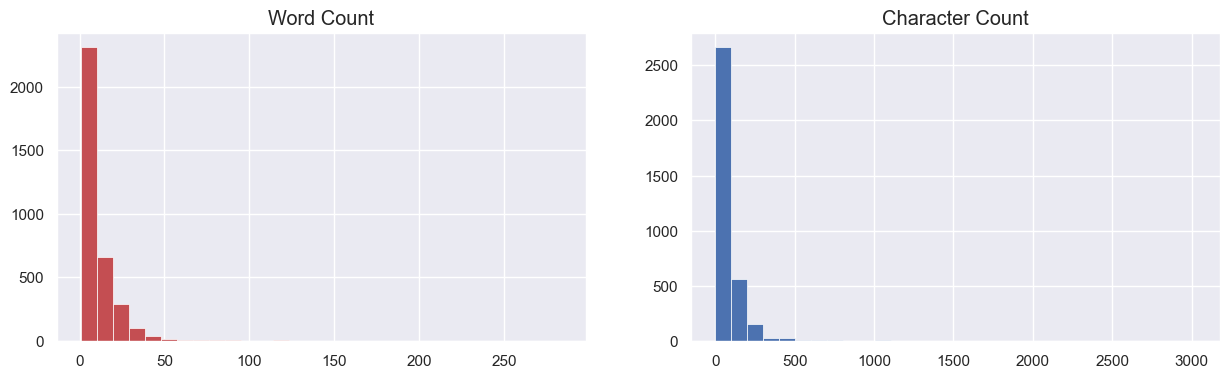

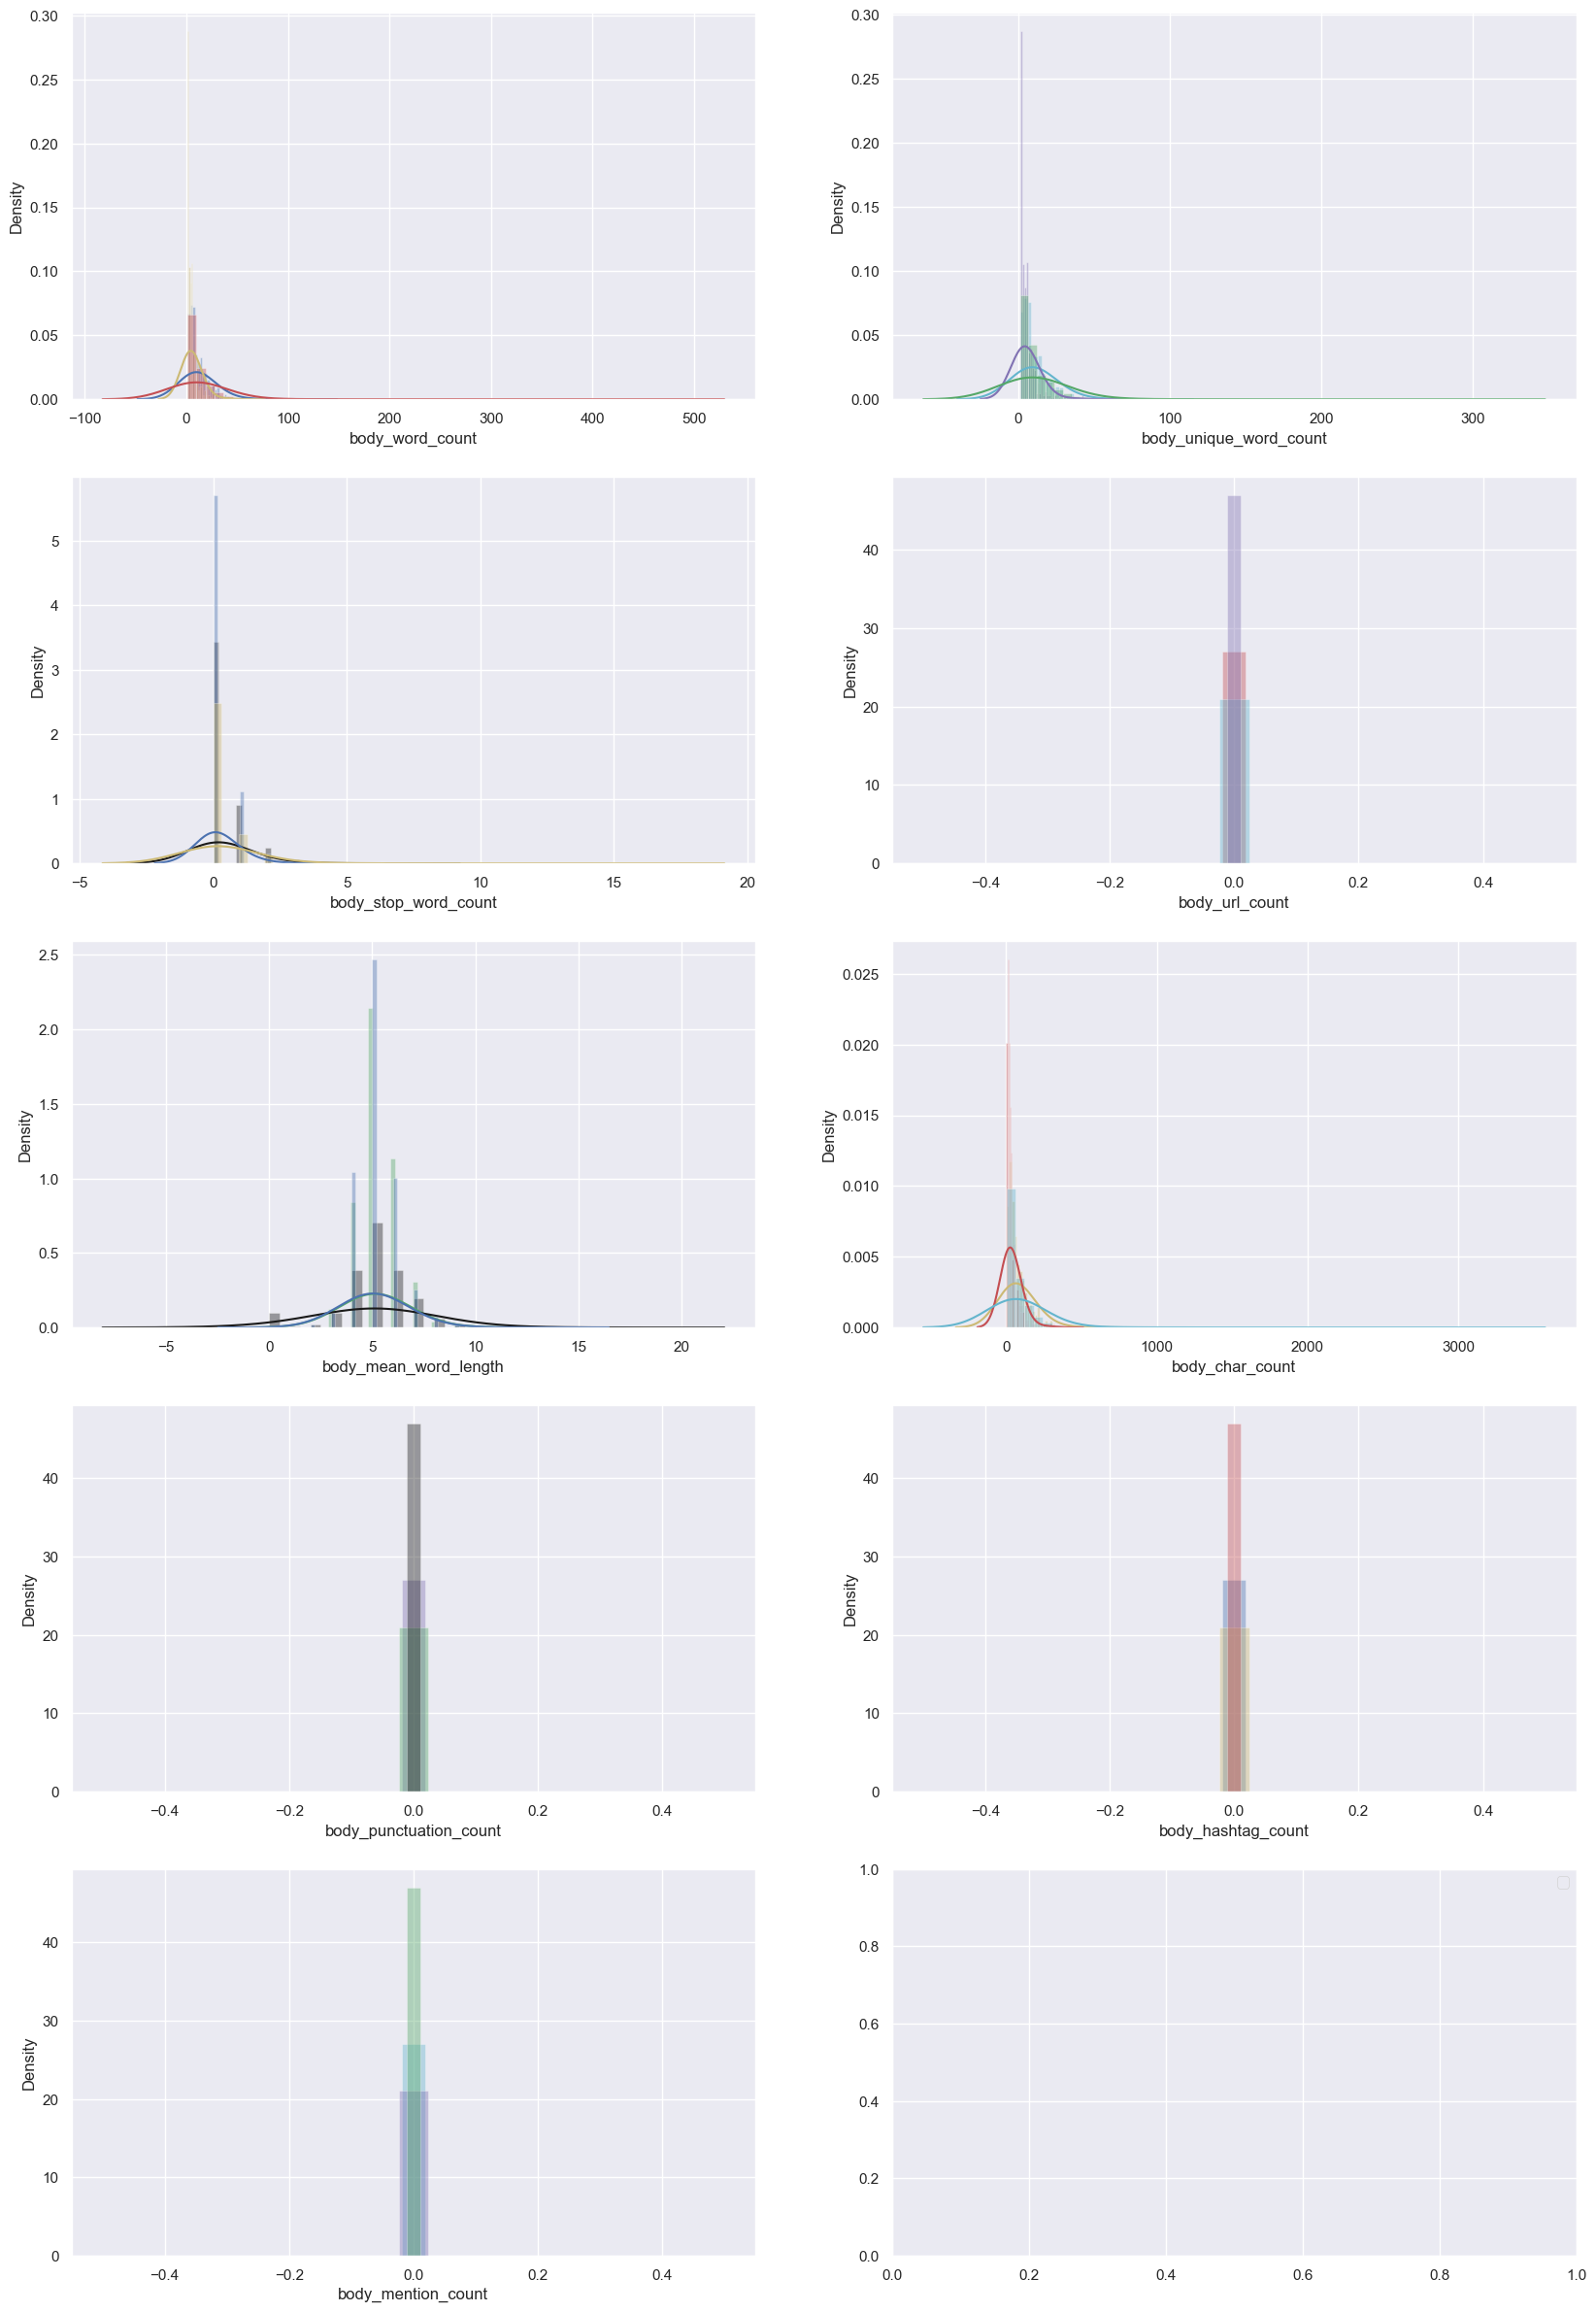

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for body column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 8 seconds

For target = sentiment_SIA

    For class = 0
Top 200 n-grams
: ['product', 'bad', 'worst', 'cooper', 'work', 'qualiti', 'wast', 'water', 'poor', 'stop', 'month', 'money', 'cool', 'buy', 'day', 'damag', 'use', 'dont', 'low', 'wheel', 'pump', 'air', 'fan', 'within', 'small', 'motor', 'smell', 'broken', 'nois', 'basal', 'even', 'like', 'come', 'good', 'plastic', 'servic', 'defect', 'purchas', 'disappoint', 'return', 'time', 'amazon', 'problem', 'receiv', 'replac', 'noisi', 'also', 'leak', 'fill', 'room', 'person', 'ever', 'size', 'item', 'perform', 'week', 'level', 'expect', 'much', 'dislik', 'total', 'useless', 'start', 'pathet', 'properli', 'first', 'bodi', 'give', 'make', 'materi', 'need', 'side', 'broke', 'bought', 'op

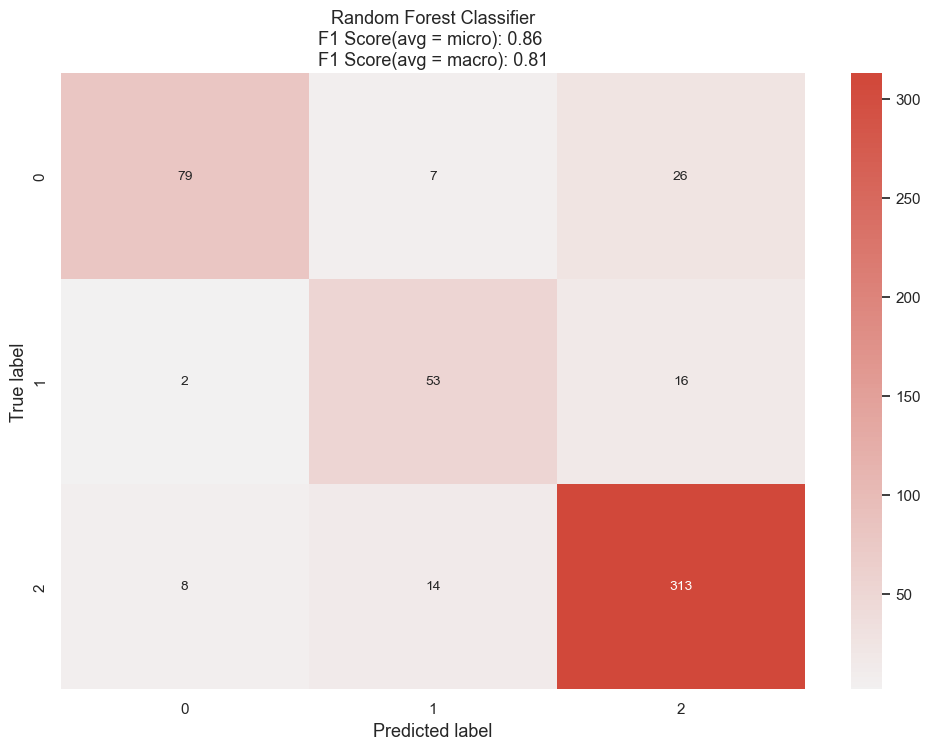

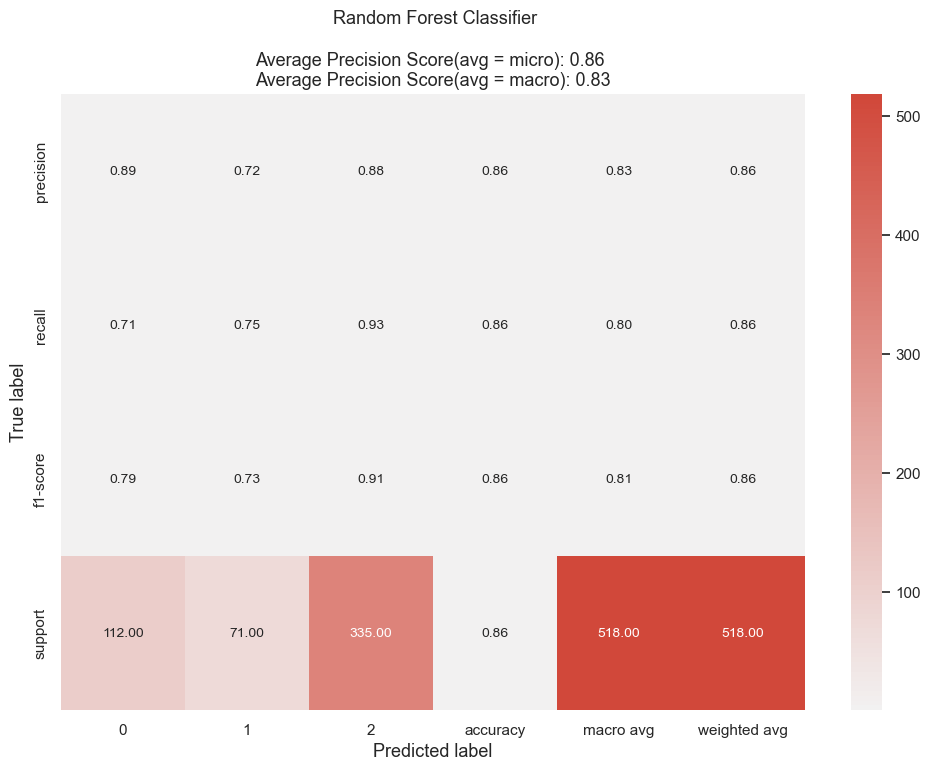

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 3.3 minutes


In [81]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,
                                            score_type="balanced_accuracy",
                                            top_num_features=500,
                                            modeltype="Classification",
                                            verbose=2,
                                            build_model=True)

##### Df for test orginal Sentiment and predicted Sentiment

In [82]:
predicted_df_autoviml = test_x[['body','sentiment_SIA']]

In [83]:
predicted_df_autoviml['Predicted_sentiment'] = final.predict(test_x[input_feature])

In [84]:
predicted_df_autoviml.head()

,body,sentiment_SIA,Predicted_sentiment
1487,good high price slow air delivery seen much faster cookers half price get locally made much better cooper k k dont look brand nothing hightech technologyrocket science,2,2
3803,motor karay ho gap,1,1
1939,using last one months worst production even suitable one presentable fan better thisdon waste money,0,0
997,got new replacement product good condition,2,2
4042,performance,1,1


In [85]:
print(classification_report(predicted_df_autoviml['sentiment_SIA'],predicted_df_autoviml['Predicted_sentiment']))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       179
           1       0.81      0.81      0.81       135
           2       0.92      0.93      0.92       549

    accuracy                           0.88       863
   macro avg       0.85      0.84      0.85       863
weighted avg       0.88      0.88      0.88       863

